<a href="https://colab.research.google.com/github/ricardoemf03/computational-physics/blob/main/Perihelio_de_mercurio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Análisis de la Precesión del Perihelio de Mercurio: Un Enfoque Numérico con Runge-Kutta de Segundo Orden**
#### **Ricardo José Manuel Escobar Matzir - 202002342**
#### **Física Computacional**

##**Definir el problema y las condiciones iniciales**

Este trabajo tiene el principal objetivo de calcular el valor del ángulo de precesión del perihelio en la órbita de Mercurio. El enfoque es a través de un análisis numérico empleando el método de Runge-Kutta de orden 2. Por otra parte, la fuerza a utilizar es la de gravitación universal pero con una corrección muy débil que nos permite predecir esta precesión.

**La fuerza viene dada por:**
$$\vec{F} = \frac{GM_SM_M}{r^2}\left(1+\frac{\alpha}{r^2}\right)\frac{\vec{r}}{r}$$

$$   \begin{array}{cc}\frac{dx}{dt} = v_x; & \hspace{12pt} \frac{dv_x}{dt} = - \frac{GM_SM_M}{r^2}\left(1+\frac{\alpha}{r^2}\right)x \\ \frac{dy}{dt} = v_y;  & \hspace{12pt}  \frac{dv_y}{dt} = - \frac{GM_SM_M}{r^2}\left(1+\frac{\alpha}{r^2}\right)y\end{array}$$

**Mientras que implementadas con el método de Runge-Kutta 2 quedan las siguientes:**

$$\begin{array}{ll}k_1 = v_n^x\Delta t  & k_3 = -\frac{GM_S}{r_n^3}\left(1+\frac{\alpha}{r_n^2}\right) x_n \Delta t   \\ k_2 =\left(v_n^x+\frac{1}{2}k_3\right)\Delta t & k_4 = -\frac{GM_S}{R_n^3}\left(1+\frac{\alpha}{R_n^2}\right)\left(x_n+\frac{1}{2}k_1\right) \Delta t \\ k_1' = v_n^y\Delta t  & k_3' = -\frac{GM_S}{r_n^3}\left(1+\frac{\alpha}{r_n^2}\right) y_n \Delta t   \\ k_2' =\left(v_n^y+\frac{1}{2}k_3'\right)\Delta t & k_4' = -\frac{GM_S}{R_n^3}\left(1+\frac{\alpha}{R_n^2}\right)\left(y_n+\frac{1}{2}k_1'\right) \Delta t\\  r_n = \sqrt{x_n^2+y_n^2} & R_n = \sqrt{\left(x_n+\frac{1}{2}k_1\right)^2+\left(y_n+\frac{1}{2}k_1'\right)^2} \end{array}$$

$$\begin{array}{ll} x_{n+1} = x_n+k_2 & \hspace{12pt} v_{n+1}^x = v_n^x +k_4  \\ y_{n+1}=y_n+k_2' & \hspace{12pt} v_{n+1}^y = v_n^y +k_4' \end{array}$$


**Y las condiciones iniciales son:**

$$\begin{array}{ll} x_0 = (1+e)a, & y_0 = 0  \\ v_0^x = 0,    & v_0^y = \sqrt{\frac{GM_S}{a}\frac{1-e}{1+e}} \end{array}$$

**Con valores para el Sol y mercurio de:**

$$ \begin{array}{l} a = 0.39 \text{ UA}\\  e = 0.206 \\  GM_S = 4\pi^2 \text{ UA}^3/\text{año}^2\\  \Delta t = 0.0001\\  N = 20 000 \end{array}$$

**Los valores de \\(\alpha\\) son \\(\alpha = 0.0008, 0.001, 0.002,  0.004\\)**

Para luego hacer una extrapolación y encontrar el ángulo de precesión para \\(\alpha = 1.1\times 10^{-8} \text{UA}^2 \\)



##**Imprementación para del programa para \\(\alpha = 0.0008\\)**

Definimos primero todas las condiciones iniciales, la cantidad de iteraciones y el paso.

In [ ]:
#condiciones inciales
import numpy as np
alpha = 0.0008    #UA^2
a = 0.39          #UA
e = 0.206         #adimensional
GM = 4*np.pi**2   #UA^3/año^2
x0 =0.47          #UA  (1+e)a
y0 = 0
vx0 = 0
vy0 = 8.2         # AU/año sqrt((GM/a)*((1-e)/(1+e)))
dt = 0.0001
N = 20000

In [ ]:
#definimos la función de la fuerza

def F(r, alpha):
  Fk = -(GM/r**3)*(1+alpha/r**2)
  return Fk

In [ ]:
#Definimos la función para el método numérico runge-kutta 2, que
#resolverá la ecuación diferencial numéricamente dada las condiciones iniciales

def RungeKutta2(x0, y0, vx0, vy0, dt, N, alpha):
  "Método de Runge-Kutta de orden 2 para la orbita de planetas"
  X, Y, VX, VY, Tiempo, DIST_MS, Deriv_DIST_MS = [], [], [], [], [], [], []
  x, y, vx, vy, distMS, deriv_distMS = x0, y0, vx0, vy0, 0, 0
  for i in range(N):
    r = np.sqrt(x**2 + y**2)
    k1 = vx*dt
    k3 = F(r, alpha)*x*dt
    k1_ = vy*dt
    R = np.sqrt((x+0.5*k1)**2+(y+0.5*k1_)**2)
    k2 = (vx+0.5*k3)*dt
    k4 = F(R, alpha)*(x+0.5*k1)*dt
    k4_ = F(R, alpha)*(y+0.5*k1_)*dt
    k3_ = F(r, alpha)*y*dt
    k2_ = (vy+0.5*k3_)*dt

    x = x+k2
    vx = vx + k4
    y = y + k2_
    vy = vy + k4_
    distMS = np.sqrt((e*a-x)**2+y**2)
    deriv_distMS = (x*vx+y*vy)/distMS

    Tiempo.append(i*dt)
    DIST_MS.append(distMS)
    Deriv_DIST_MS.append(deriv_distMS)
    X.append(x)
    Y.append(y)
    VX.append(vx)
    VY.append(vy)
  return X, Y, VX, VY, Tiempo, DIST_MS, Deriv_DIST_MS

Una vez ya creada la función \\(\texttt{RungeKutta2}(\cdots)\\), la llamanos dandole nuestras condiciones iniciales y que, en primera instancia grafique la órbita de Mercurio alrededor del Sol.

In [ ]:
x_runge, y_runge, vx_runge, vy_runge, Tiempo_runge, distMS_runge, deriv_distMS_runge = RungeKutta2(x0, y0, vx0, vy0, dt, N, alpha)

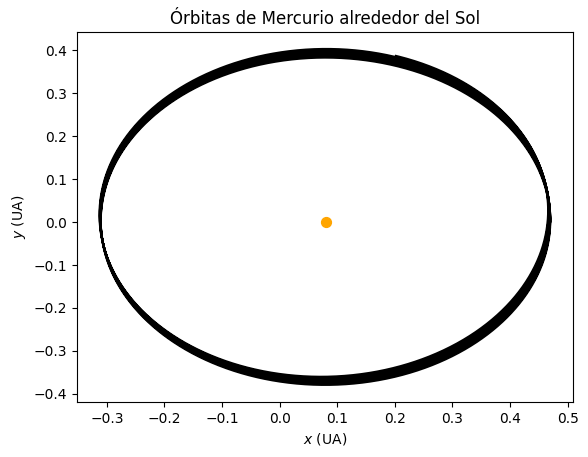

In [ ]:
import matplotlib.pyplot as plt

plt.plot(x_runge, y_runge, color = "black")
plt.scatter(e*a, 0, color='orange', s=50)
plt.title("Órbitas de Mercurio alrededor del Sol")
plt.xlabel("$x $ (UA)")
plt.ylabel("$y $ (UA)")
plt.show()

Ahora graficamos el ángulo que hace el vector de posición de Mercurio con la horizontal, esto en función del tiempo. Claramente los ángulos irán variando de 0 a 360 grados es una órbita, luego se reiniciará.

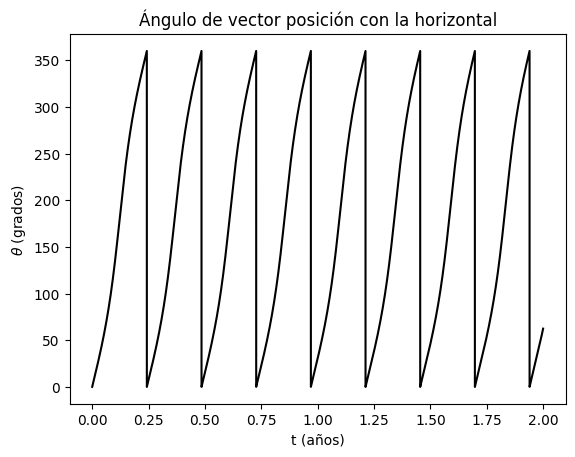

In [ ]:
ANG = []
for i in range(len(x_runge)):
  ang = np.degrees(np.arctan2(y_runge[i],x_runge[i]))
  if 0 <= ang <=180:
    ANG.append(ang)
  else:
    ANG.append(360+ang)

plt.plot(Tiempo_runge, ANG, color = "black")
plt.title("Ángulo de vector posición con la horizontal")
plt.xlabel("t (años)")
plt.ylabel("$\\theta$ (grados)")
plt.show()

Ahora graficamos la distancia entre el vector de posición de Mercurio y la posición del Sol en función del tiempo. En esta gráfica visualizamos un comportamiento oscilatorio como era de esperarse. Los máximos indican los puntos más alejados de Mercurio respecto al Sol (el afelio), mientras que los mínimos representan el punto más cercano de Mercurio al Sol (el perihelio).

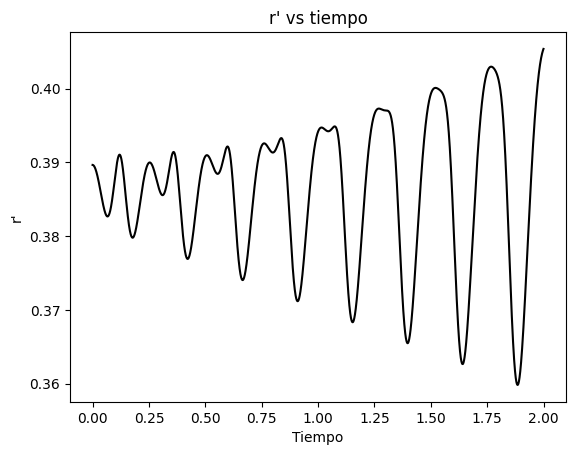

In [ ]:
plt.plot(Tiempo_runge, distMS_runge, color = "black")
plt.title("r' vs tiempo")
plt.xlabel("Tiempo")
plt.ylabel("r'")
plt.show()

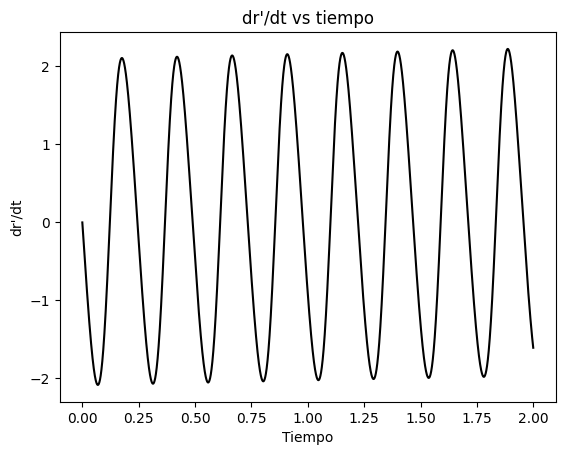

In [ ]:
plt.plot(Tiempo_runge, deriv_distMS_runge, color = "black")
plt.title("dr'/dt vs tiempo")
plt.xlabel("Tiempo")
plt.ylabel("dr'/dt")
plt.show()

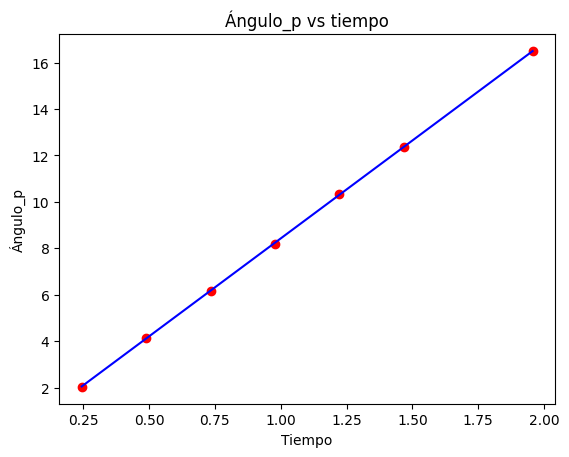

In [ ]:
#aqui vamos a calcular el angulo_p que son todos los ángulos en que
#mercurio pasa por su perihelio, es decir, su punto más cercano al Sol
ANG_P = []
Tiempo_P = []
interv = 0.002 #intervalo cercano a cero
for i in range(len(Tiempo_runge)):
  val = deriv_distMS_runge[i]
  if -interv <= val <= interv:
    if 0 <= ANG[i] <= 180: #dado que solo nos interesan los angulos de perihelio
      ANG_P.append(ANG[i])
      Tiempo_P.append(Tiempo_runge[i])
m, b = np.polyfit(Tiempo_P, ANG_P, 1)
plt.scatter(Tiempo_P, ANG_P, color = "red")
# Graficar la línea de regresión
plt.plot(Tiempo_P, m * np.array(Tiempo_P) + b, color="blue", label="Regresión lineal")
plt.title("Ángulo_p vs tiempo")
plt.xlabel("Tiempo")
plt.ylabel("Ángulo_p")
plt.show()

In [ ]:
print(ANG_P)
print(Tiempo_P)
print(m)

[2.0253876455712487, 4.150726694777627, 6.176091347232791, 8.201444506544043, 10.32674904006638, 12.352079207416176, 16.502667898570902]
[0.2444, 0.48900000000000005, 0.7335, 0.9780000000000001, 1.2226000000000001, 1.4671, 1.9562000000000002]
8.441447611811386


Ahora calculamos la pendiente pero para todos los valores de alpha

In [ ]:
#Copia de la celda anterior, para modificar
#aqui vamos a calcular el angulo_p que son todos los ángulos en que
#mercurio pasa por su perihelio, es decir, su punto más cercano al Sol
ALPHA = [0.0008, 0.001, 0.002, 0.004]
Pendientes = []

for alpha1 in ALPHA:
  x_runge1, y_runge1, vx_runge1, vy_runge1, Tiempo_runge1, distMS_runge1, deriv_distMS_runge1 = RungeKutta2(x0, y0, vx0, vy0, dt, N, alpha1)
  #Calculamos todos los álgulos de las órbitas
  ANG1 = []
  for i in range(len(Tiempo_runge1)):
    ang = np.degrees(np.arctan2(y_runge1[i],x_runge1[i]))
    if 0 <= ang <=180:
      ANG1.append(ang)
    else:
      ANG1.append(360+ang)
  #calculamos los ángulos del perihelio con la horizontal y sus tiempos correspondientes
  ANG_P = []
  Tiempo_P = []
  interv = 0.002 #intervalo cercano a cero
  for i in range(len(Tiempo_runge1)):
    val = deriv_distMS_runge1[i]
    if -interv <= val <= interv:
      if 0 <= ANG1[i] <= 180: #dado que solo nos interesan los angulos de perihelio
        ANG_P.append(ANG1[i])
        Tiempo_P.append(Tiempo_runge1[i])
  m, b = np.polyfit(Tiempo_P, ANG_P, 1) #hacemos una regresión lineal de los puntos
  Pendientes.append(m)

print(Pendientes)
print(ALPHA)

[8.441447611811386, 10.575259567343307, 21.659429973341688, 45.37092699521466]
[0.0008, 0.001, 0.002, 0.004]


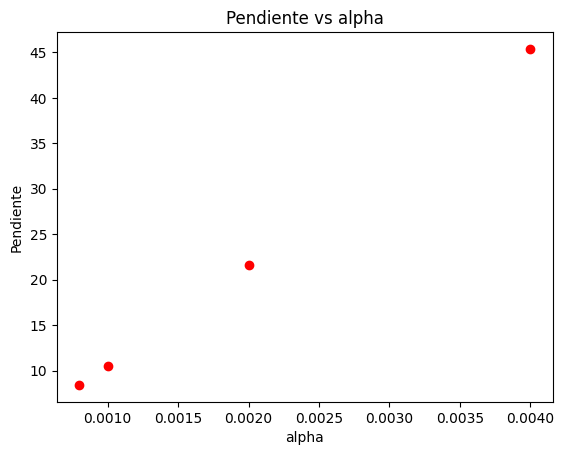

45.782779714671804  segundo de arco por siglo


In [ ]:
m1, b1 = np.polyfit(ALPHA, Pendientes, 1)
plt.scatter(ALPHA, Pendientes, color = "red")
plt.title("Pendiente vs alpha")
plt.xlabel("alpha")
plt.ylabel("Pendiente")
plt.show()
print((m1*(1.1e-8))*100*3600, " segundo de arco por siglo")